# Supervised Learning: Regression

N.B. The data set used in these examples have been optimised and cleaned for supervised classification algorithms. Therefore, this notebook only serves as an example to indicate how to implement a regression algorithm.

https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_classes.py

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/titanic_preprocessed.csv')
data = data.drop(columns=['male'])

In [6]:
data.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


# Linear Regression

## Data Processing (LR)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = data['fare'] 

In [9]:
X = data.drop('fare', axis=1)  

In [10]:
X

,survived,pclass,age,sibsp,parch,adult_male,alone,Q,S
0,0,3,22.0,1,0,1,0,0,1
1,1,1,38.0,1,0,0,0,0,0
2,1,3,26.0,0,0,0,1,0,1
3,1,1,35.0,1,0,0,0,0,1
4,0,3,35.0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,1,0,1
887,1,1,19.0,0,0,0,1,0,1
888,0,3,24.0,1,2,0,0,0,1
889,1,1,26.0,0,0,1,1,0,0


In [11]:
# Y (fare) = B0 + BSurvived + BPclass + BAge +

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train the Model (LR)

In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

## Test the Model

In [16]:
y_pred = model.predict(X_test)

In [17]:
pd.DataFrame({'test':y_test, 'predicted':y_pred})

,test,predicted
624,16.1000,-0.724955
145,36.7500,50.355053
250,7.2500,-1.367691
320,7.2500,-0.939200
637,26.2500,47.784108
...,...,...
266,39.6875,38.542634
122,30.0708,57.628478
139,79.2000,80.739406
140,15.2458,36.538981


$$\text{adj_}r^{2} = 1 - \frac{(1 - R^{2})(N-1)}{(N - p - 1)},$$

where $R^{2}$ denotes the $R^{2}$ score, $N$ the size of the test data and $p$ the number of predictors. 

In [19]:
from sklearn.metrics import r2_score

In [20]:
adjusted_r2 = 1 - ((1 - r2_score(y_test, y_pred))*(len(X_test)-1)) / (len(X_test) - len(X.transpose()) - 1) 
adjusted_r2

0.30560172900744276

## Visualise 

In [21]:
df = pd.DataFrame({'test':y_test, 'predicted':y_pred})
df = df.reset_index(drop=True)
df = df.reset_index()
data = pd.melt(df, id_vars=['index'], value_vars=['test', 'predicted'])

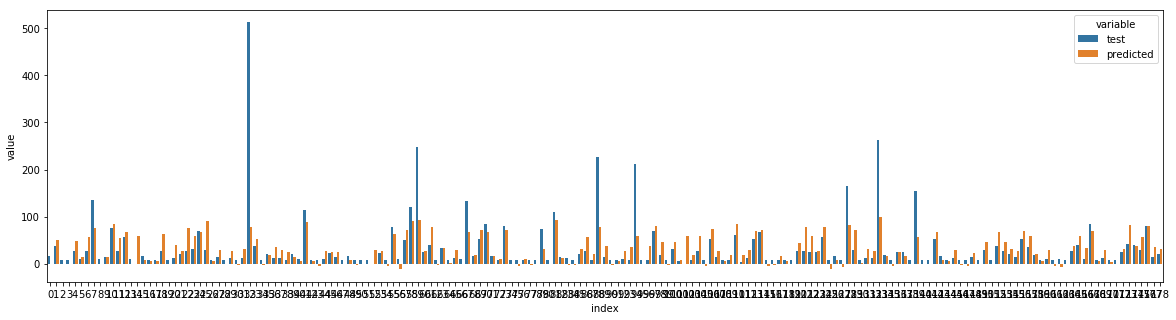

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x="index", y="value", hue="variable", data=data)

# Decision Trees

## Data Processing (DT)


In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/titanic_preprocessed.csv')
data = data.drop(columns=['male'])

In [24]:
y = data['fare'] 
X = data.drop('fare', axis=1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train the Model (DT)

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

## Test the Model (DT)

In [27]:
y_pred = model.predict(X_test)

In [28]:
pd.DataFrame({'test':y_test, 'predicted':y_pred})

,test,predicted
408,7.7750,8.805000
715,7.6500,8.036437
757,11.5000,32.666667
680,8.1375,7.689600
369,69.3000,67.320833
...,...,...
345,13.0000,10.500000
707,26.2875,0.000000
129,6.9750,8.050000
577,55.9000,51.931250


In [29]:
df = pd.DataFrame({'test':y_test, 'predicted':y_pred})
df = df.reset_index(drop=True)
df = df.reset_index()
data = pd.melt(df, id_vars=['index'], value_vars=['test', 'predicted'])

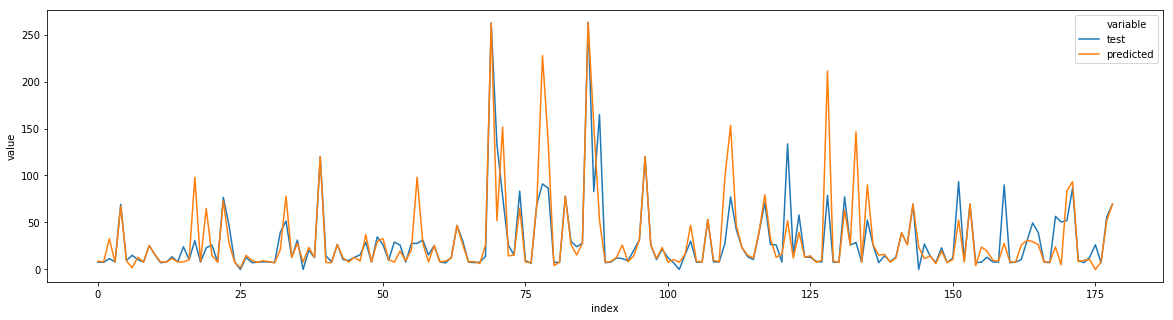

In [30]:
plt.figure(figsize=(20,5))
sns.lineplot(x="index", y="value", hue="variable", data=data)

# Bonus (Insurance)

In [31]:
insurance = pd.read_csv('insurance.csv')

In [32]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Label Encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [34]:
x = insurance['sex']
y = label_encoder.fit_transform(x)
insurance['sex'] = y

In [35]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [36]:
x = insurance['region']
y = label_encoder.fit_transform(x)
insurance['region'] = y

In [37]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,1,10600.54830
1334,18,0,31.920,0,no,0,2205.98080
1335,18,0,36.850,0,no,2,1629.83350
1336,21,0,25.800,0,no,3,2007.94500


In [38]:
x = insurance['smoker']
y = label_encoder.fit_transform(x)
insurance['smoker'] = y

In [39]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Training

In [40]:
y = insurance['charges'] 
X = insurance.drop('charges', axis=1)  

In [41]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

## Prediction

In [45]:
y_pred = model.predict(X_test)

In [46]:
pd.DataFrame({'test':y_test, 'predicted':y_pred})

,test,predicted
447,11454.02150,10684.073123
168,2719.27975,3621.583235
819,55135.40209,31806.304456
415,7345.72660,10889.349230
936,32108.66282,10108.747159
...,...,...
533,19214.70553,8927.653817
717,13112.60480,11557.528569
357,9620.33070,10990.705328
955,3875.73410,8969.030080


## Evaluation

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test, y_pred)

0.7016363611078231

$$\text{adj_}r^{2} = 1 - \frac{(1 - R^{2})(N-1)}{(N - p - 1)},$$

where $R^{2}$ denotes the $R^{2}$ score, $N$ the size of the test data and $p$ the number of predictors. 

In [49]:
adjusted_r2 = 1 - ((1 - r2_score(y_test, y_pred))*(len(X_test)-1)) / (len(X_test) - len(X.transpose()) - 1) 
adjusted_r2

0.6947774268804168